In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

**Import and Read Data**

In [3]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


In [4]:
dataset= pd.read_csv('heart.csv')
print (dataset.head())
print (dataset.columns)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


**Graphs and Visualisation**

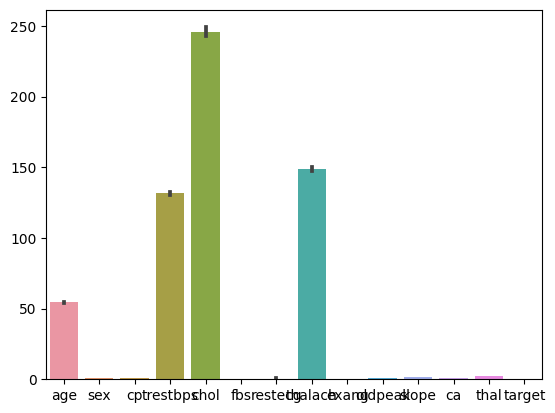

In [5]:
import seaborn as sns
sns.barplot(data=dataset)
plt.show()

<Axes: >

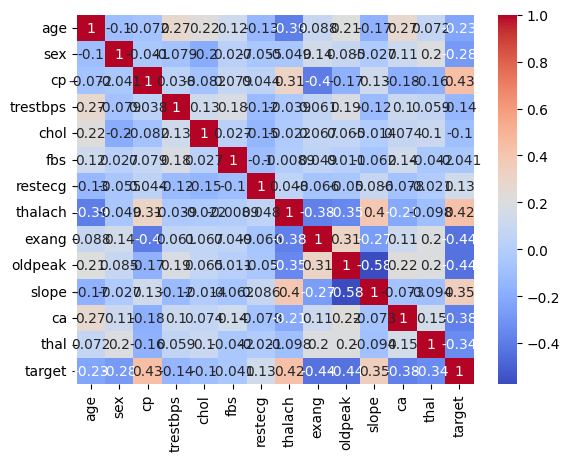

In [6]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

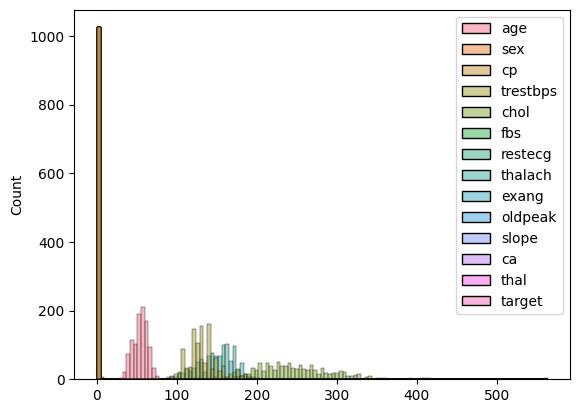

In [7]:

sns.histplot(data=dataset)
plt.show()

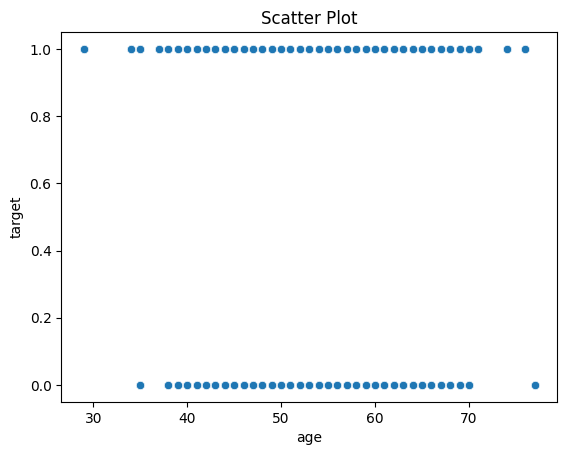

In [8]:
sns.scatterplot(x='age', y='target', data=dataset)
plt.title('Scatter Plot')
plt.show()

**Divide the data into Target variable and Predictible Variable**

In [9]:
x=dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=dataset['target']

**Split the data into test and train**

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

**Setting the range of the predictable variables**

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**Linear Regression**

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)



Intercept: 0.8499783188512678
Coefficients: [-0.06835534 -0.22522584  0.33130369 -0.20251479 -0.20668605  0.01319483
  0.12515714  0.37831271 -0.14511887 -0.4608261   0.1196187  -0.35003972
 -0.34885191]


In [13]:
print("Acurracy from the training set {:.2f}".format(regressor.score(x_train, y_train)))
print("Acurracy from the testing set {:.2f}".format(regressor.score(x_test, y_test)))

Acurracy from the training set 0.50
Acurracy from the testing set 0.55


**KNN**

In [18]:

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
print("Acurracy from the training set {:.2f}".format(knn.score(x_train, y_train)))
print("Acurracy from the testing set {:.2f}".format(knn.score(x_test, y_test)))


Acurracy from the training set 0.95
Acurracy from the testing set 0.86


In [20]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_train_pred= knn.predict(x_train)
y_test_pred= knn.predict(x_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix - Training Set:")
print(cm_train)
print("\nConfusion Matrix - Testing Set:")
print(cm_test)

Confusion Matrix - Training Set:
[[387  14]
 [ 30 389]]

Confusion Matrix - Testing Set:
[[87 11]
 [17 90]]


**SVM**

In [21]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(x_train, y_train)

print("Acurracy from the training set {:.2f}".format(svm.score(x_train, y_train)))
print("Acurracy from the testing set {:.2f}".format(svm.score(x_test, y_test)))


Acurracy from the training set 0.90
Acurracy from the testing set 0.90


In [22]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_train_pred= svm.predict(x_train)
y_test_pred= svm.predict(x_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix - Training Set:")
print(cm_train)
print("\nConfusion Matrix - Testing Set:")
print(cm_test)

Confusion Matrix - Training Set:
[[364  37]
 [ 48 371]]

Confusion Matrix - Testing Set:
[[88 10]
 [10 97]]


**Naive Bayes**

In [23]:
from sklearn.naive_bayes import GaussianNB
gaussian= GaussianNB()
gaussian.fit(x_train, y_train)

print("Acurracy from the training set {:.2f}".format(gaussian.score(x_train, y_train)))
print("Acurracy from the testing set {:.2f}".format(gaussian.score(x_test, y_test)))


Acurracy from the training set 0.82
Acurracy from the testing set 0.85


In [24]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_train_pred= gaussian.predict(x_train)
y_test_pred= gaussian.predict(x_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix - Training Set:")
print(cm_train)
print("\nConfusion Matrix - Testing Set:")
print(cm_test)

Confusion Matrix - Training Set:
[[316  85]
 [ 62 357]]

Confusion Matrix - Testing Set:
[[79 19]
 [11 96]]


**Decision Tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(x_train, y_train)

print("Acurracy from the training set {:.2f}".format(tree.score(x_train, y_train)))
print("Acurracy from the testing set {:.2f}".format(tree.score(x_test, y_test)))


Acurracy from the training set 1.00
Acurracy from the testing set 0.92


In [26]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_train_pred= tree.predict(x_train)
y_test_pred= tree.predict(x_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix - Training Set:")
print(cm_train)
print("\nConfusion Matrix - Testing Set:")
print(cm_test)

Confusion Matrix - Training Set:
[[401   0]
 [  0 419]]

Confusion Matrix - Testing Set:
[[94  4]
 [12 95]]


**Conclusion**

1.In SVM model accuracy on both the training and testing sets is high and similar, such as in this case, it indicates that the model is performing well and giving highest accuracy

2.Decision Tree and KNN both indicates that the models are  overfitting .
